In [14]:
# install missing packets in jupyter notebook
!pip install cmdstanpy
!pip install arviz
!pip install scipy
!pip install ipywidgets widgetsnbextension pandas-profiling

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
F = len("Natalia")
L = len("Pluta")

## Excercise 1 -  Generated Quantities Block

In [19]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:compiling stan file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_1.stan to exe file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_1
INFO:cmdstanpy:compiled model executable: /usr/data-analytics-lectures/Data Analytics/Lab 2/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpqpt_z8b3/tmpy7btcwrz.hpp /tmp/tmpqpt_z8b3/tmpy7btcwrz.stan
Warning in '/tmp/tmpqpt_z8b3/tmpy7btcwrz.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 

In [20]:
# task 1
samples = gen_quant.sample(data={'M':F}, 
                           fixed_param=True, 
                           iter_sampling=1000, 
                           iter_warmup=0, 
                           chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


   lp__  accept_stat__    lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0   0.0            0.0  370.6250     354.0     361.0     339.0     359.0   
1   0.0            0.0   98.1797      93.0      94.0      86.0      96.0   
2   0.0            0.0   39.8303      33.0      49.0      42.0      48.0   
3   0.0            0.0   19.3320      22.0      17.0      14.0      20.0   
4   0.0            0.0  163.8390     188.0     161.0     164.0     162.0   

   y_sim[5]  y_sim[6]  y_sim[7]  
0     368.0     347.0     403.0  
1      89.0     103.0      97.0  
2      32.0      42.0      40.0  
3      18.0      29.0      18.0  
4     171.0     170.0     153.0  
['lambda', 'y_sim[1]', 'y_sim[2]', 'y_sim[3]', 'y_sim[4]', 'y_sim[5]', 'y_sim[6]', 'y_sim[7]']


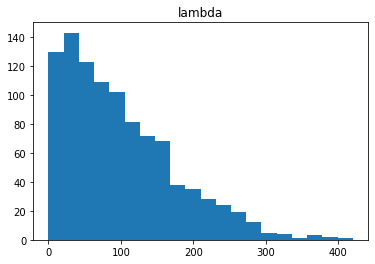

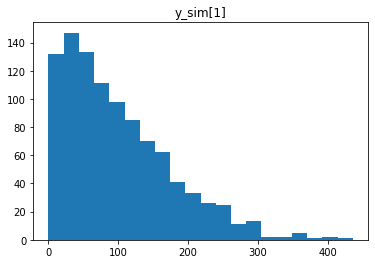

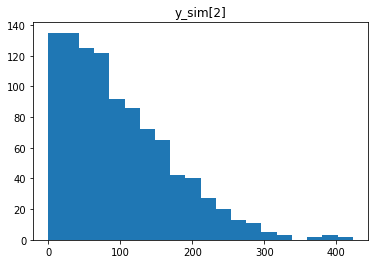

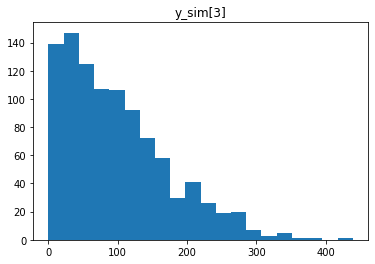

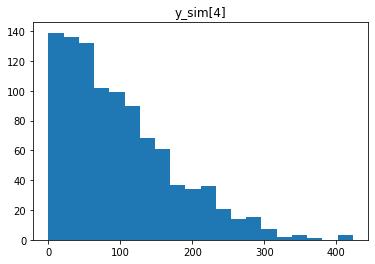

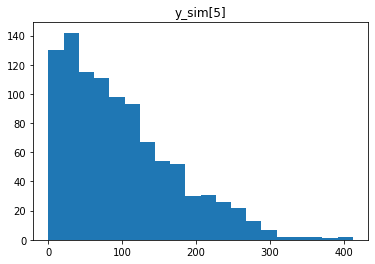

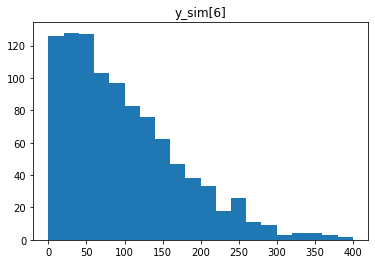

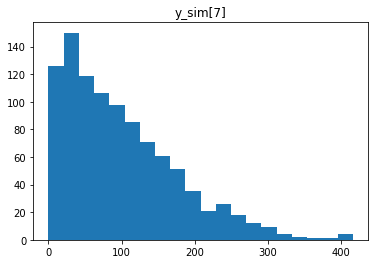

In [21]:
# task 2
df = samples.draws_pd()
print(df.head())

# task 3
columns = ["lambda"]+[f"y_sim[{i}]" for i in range(1, F+1)]
print(columns)

for column in columns:
    plt.hist(df[column], bins=20)
    plt.title(column)
    plt.show()

## Excercise 2 - Constraints on the data 

In [27]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
df_bern1 = samp_bern1.draws_pd()
print(df_bern1.head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -3.89643       1.000000    0.908171          2.0           3.0          0.0   
1 -3.15302       1.000000    0.908171          2.0           3.0          0.0   
2 -3.02080       0.955739    0.908171          2.0           3.0          0.0   
3 -2.78934       0.990736    0.908171          1.0           3.0          0.0   
4 -3.36712       0.862575    0.908171          1.0           3.0          0.0   

   energy__     theta  
0   4.32719  0.827829  
1   3.74306  0.708098  
2   3.65455  0.670817  
3   3.06780  0.454336  
4   3.42563  0.246449  


In [31]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
df_bern2 = samp_bern2.draws_pd()
print(df_bern2.head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -2.78723       0.993592     1.06087          1.0           3.0          0.0   
1 -2.97986       0.930341     1.06087          2.0           3.0          0.0   
2 -2.84303       0.905114     1.06087          2.0           3.0          0.0   
3 -3.14390       0.950187     1.06087          2.0           3.0          0.0   
4 -2.87243       1.000000     1.06087          1.0           1.0          0.0   

   energy__     theta  
0   3.02885  0.542703  
1   3.09067  0.343120  
2   3.40280  0.406983  
3   3.14724  0.294185  
4   3.06452  0.389663  


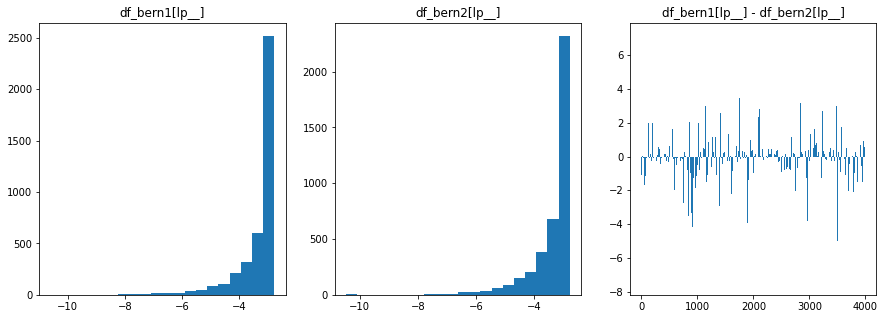

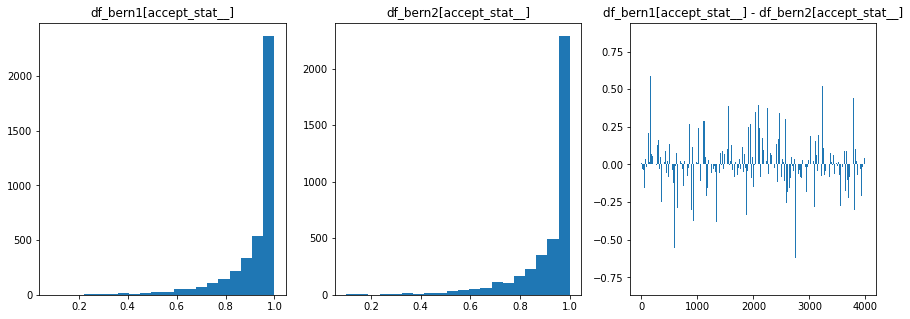

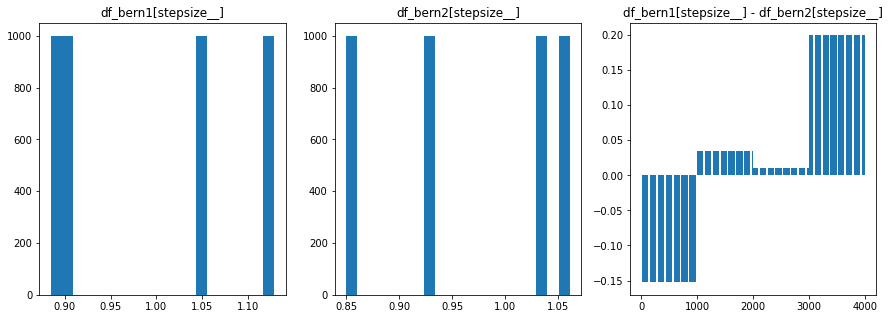

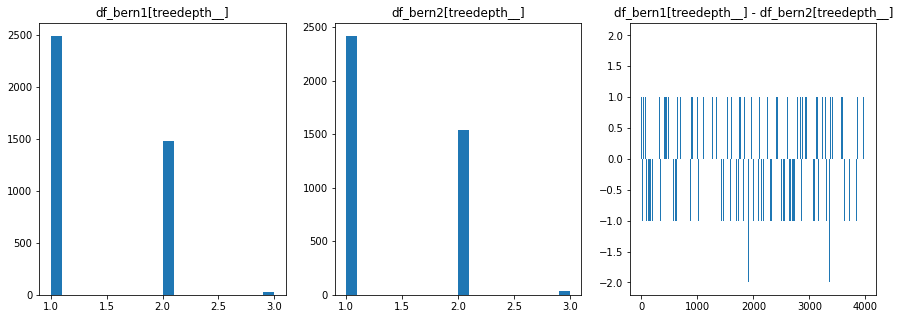

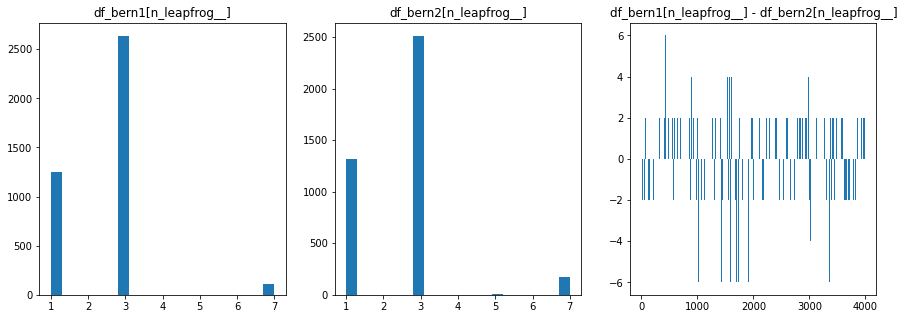

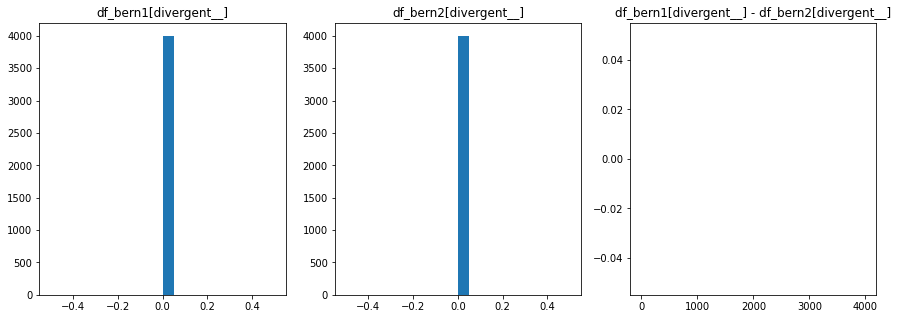

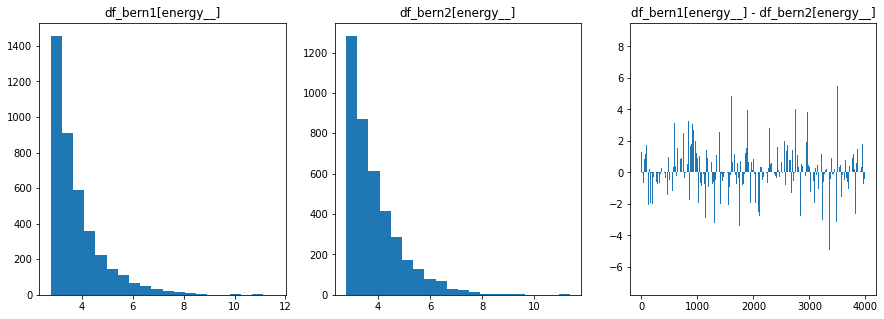

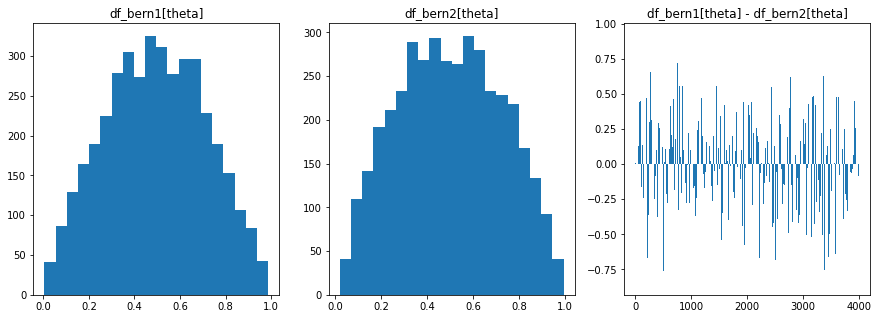

In [42]:
columns = df_bern1.columns
# plot 3 histograms in one row

for column in columns:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].hist(df_bern1[column], bins=20)
    axs[0].set_title(f"df_bern1[{column}]")
    axs[1].hist(df_bern2[column], bins=20)
    axs[1].set_title(f"df_bern2[{column}]")
    diff = [(a - b) for a, b in zip(df_bern1[column], df_bern2[column])]
    axs[2].bar(range(len(diff)), diff)
    axs[2].set_title(f"df_bern1[{column}] - df_bern2[{column}]")
    plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [38]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_4.stan to exe file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_4
INFO:cmdstanpy:compiled model executable: /usr/data-analytics-lectures/Data Analytics/Lab 2/code_4
INFO:cmdstanpy:created output directory: /usr/data-analytics-lectures/Data Analytics/Lab 2/samples
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320012219_1.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320012219_2.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320012219_3.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320012219_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

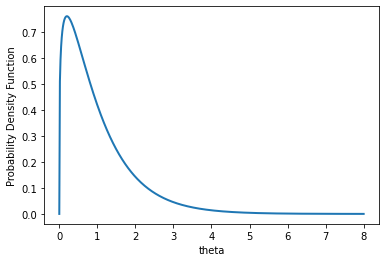

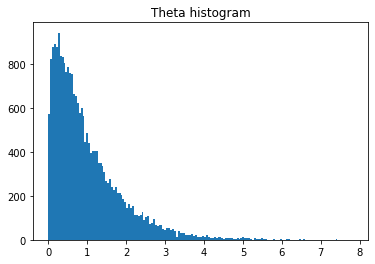

In [45]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples with 160 bins
plt.hist(out_gamma1.stan_variable('theta'), bins=160)
plt.title("Theta histogram")
plt.show()


### Constrained parameter

In [47]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_5.stan to exe file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_5
INFO:cmdstanpy:compiled model executable: /usr/data-analytics-lectures/Data Analytics/Lab 2/code_5
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320015139_1.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320015139_2.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320015139_3.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320015139_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

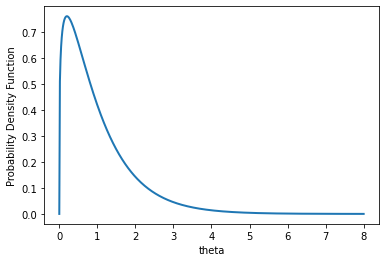

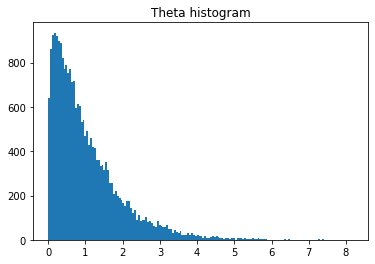

In [48]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples from the second model with 160 bins
plt.hist(out_gamma2.stan_variable('theta'), bins=160)
plt.title("Theta histogram")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [49]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = len("Natalia") # number of letters in the first name
L = len("Pluta") # number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
      'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_6.stan to exe file /usr/data-analytics-lectures/Data Analytics/Lab 2/code_6
INFO:cmdstanpy:compiled model executable: /usr/data-analytics-lectures/Data Analytics/Lab 2/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmp10d4z9e7/tmpu43n4jcq.hpp /tmp/tmp10d4z9e7/tmpu43n4jcq.stan
Warning in '/tmp/tmp10d4z9e7/tmpu43n4jcq.stan', line 3, column 46: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/tmp10d4z9e7/tmpu43n4jcq.stan', line 3, column 58: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning 

chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


## Excercise 5 - different methods of defining models


In [ ]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)



In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable